Nama : Cendekia Luthfieta Nazalia
username : luthfieta
email : CendekiaLNazalia@gmail.com

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-27 00:52:44--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.60MB/s    in 96s     

2021-07-27 00:54:21 (3.20 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
os.listdir('/tmp/rockpaperscissors')

['rps-cv-images', 'scissors', 'README_rpc-cv-images.txt', 'paper', 'rock']

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/rock'))

726

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/scissors'))

750

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/paper'))

712

In [ ]:
# membuat nama directori
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
# membuat direktori train dan validation
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [ ]:
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [ ]:
os.listdir('/tmp/rockpaperscissors')

['rps-cv-images',
 'scissors',
 'README_rpc-cv-images.txt',
 'train',
 'paper',
 'val',
 'rock']

In [ ]:
from sklearn.model_selection import train_test_split
# memecah direktori rock menjadi data train dan data validation
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)

# memecah direktori paper menjadi data train dan data validation
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)

# memecah direktori scissors menjadi data train dan data validation
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [ ]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

# membuat directory baru di dalam directory train dan val
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)

In [ ]:
# meng copy data train dan data val ke directory baru
import shutil

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/train/rock'))

435

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/val/rock'))

291

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/train/scissors'))

450

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/val/scissors'))

300

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/train/paper'))

427

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/val/paper'))

285

In [ ]:
# membuat image data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data latih
    target_size =(150,150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size = 32, # karena kita merupakan masalah klasifikasi > 2 kelas maka menggunakan class_mode = 'categorical'
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
# membuat model 
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 49s - loss: 1.1297 - accuracy: 0.3663 - val_loss: 1.0218 - val_accuracy: 0.6438
Epoch 2/20
25/25 - 48s - loss: 0.7801 - accuracy: 0.6662 - val_loss: 0.5931 - val_accuracy: 0.7500
Epoch 3/20
25/25 - 48s - loss: 0.4837 - accuracy: 0.8263 - val_loss: 0.3165 - val_accuracy: 0.9062
Epoch 4/20
25/25 - 47s - loss: 0.3303 - accuracy: 0.8863 - val_loss: 0.2268 - val_accuracy: 0.9250
Epoch 5/20
25/25 - 46s - loss: 0.2057 - accuracy: 0.9300 - val_loss: 0.2282 - val_accuracy: 0.9500
Epoch 6/20
25/25 - 48s - loss: 0.2002 - accuracy: 0.9337 - val_loss: 0.2183 - val_accuracy: 0.9312
Epoch 7/20
25/25 - 48s - loss: 0.1921 - accuracy: 0.9425 - val_loss: 0.1204 - val_accuracy: 0.9812
Epoch 8/20
25/25 - 47s - loss: 0.1434 - accuracy: 0.9500 - val_loss: 0.1659 - val_accuracy: 0.9438
Epoch 9/20
25/25 - 47s - loss: 0.1755 - accuracy: 0.9463 - val_loss: 0.0974 - val_accuracy: 0.9625
Epoch 10/20
25/25 - 47s - loss: 0.1209 - accuracy: 0.9575 - val_loss: 0.1185 - val_accuracy: 0.9375
Epoch 11/

Saving 2DQbLQfHlfrcATqi.png to 2DQbLQfHlfrcATqi.png
2DQbLQfHlfrcATqi.png
paper


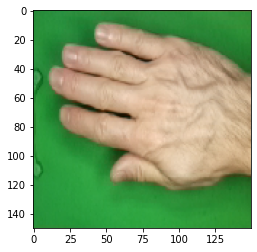

In [28]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')